# K-Means Test
***
In this notebook, I'll try to use k-means over a simple 2-features dataset, I'll eventually use and and try to explain the Elbow and Silhouette evaluation methods.
First of all, we import:
1. *numpy* 
2. *matplotlib.pyplot* 
3. *pandas* 
4. *KMeans* (personal implementation)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from KMeans import KMeans as km

In [3]:
data = pd.read_csv('./datasets/kmeans.csv')
print(data.head(4)) # see DataFrame's header

   ID    x1   x2
0   0  8.00  8.0
1   1  8.23  8.5
2   2  7.88  9.0
3   3  9.00  9.0


In [4]:
X = data.to_numpy()
print(X[0:5, :]) # print first 5 rows

[[0.   8.   8.  ]
 [1.   8.23 8.5 ]
 [2.   7.88 9.  ]
 [3.   9.   9.  ]
 [4.   7.   9.  ]]


##### Let's try now to visualize the data and get insights about the number of clusters:
remark that the first column represent the sample key (ID) and the 2nd and 3rd column are the features of out training set, we'll name X1 and X2 the first and second respectively

In [5]:
X1 = X[:, 1]
X2 = X[:, 2]
print('_______________________________________________________________________________')
print('Feature1: ')
print(X1)
print('_______________________________________________________________________________')
print('Feature2:')
print(X2)

_______________________________________________________________________________
Feature1: 
[ 8.    8.23  7.88  9.    7.    7.5  10.    9.78  6.5   6.9  11.   -6.
 -6.23 -5.88 -7.   -5.   -5.5  -8.   -7.78 -4.5  -4.9  -9.   -6.   -6.23
 -5.88 -7.   -5.   -5.5  -8.   -7.78 -4.5  -4.9  -9.    4.5   4.73  4.38
  5.5   3.5   4.    6.5   6.28  3.    3.4   7.5  -5.   -4.   -2.5   5.
  4.    3.5   7.    5.  ]
_______________________________________________________________________________
Feature2:
[  8.     8.5    9.     9.     9.     8.25   7.5    5.9    6.5   10.
   5.5   -8.    -8.5   -9.    -9.    -9.    -8.25  -7.5   -5.9   -6.5
 -10.    -5.5    8.     8.5    9.     9.     9.     8.25   7.5    5.9
   6.5   10.     5.5  -11.5  -12.   -12.5  -12.5  -12.5  -11.75 -11.
  -9.4  -10.   -13.5   -9.     0.    -2.21  -0.99   0.     3.9    2.35
   3.    10.12]


***
Then and thanks to pyplot, we'll plot the two Features in 2D Space:

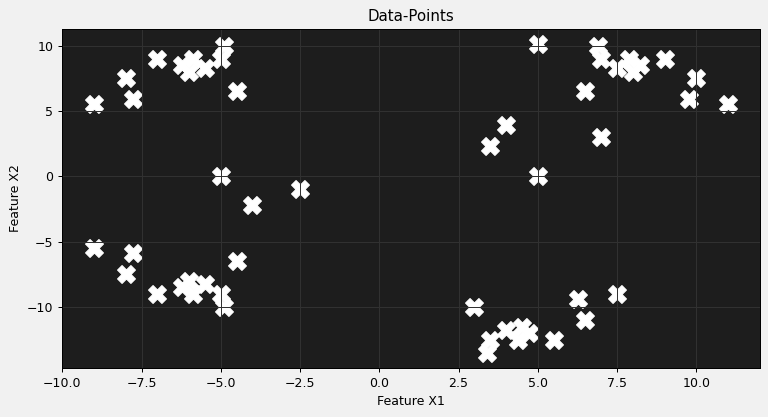

In [6]:
plt.figure(figsize=(10, 5), dpi=90, edgecolor='b', facecolor='#f1f1f1')
ax = plt.gca()
ax.set_facecolor('#1d1d1d')
ax.scatter(X1, X2, s=200, marker='X', c='w') # plot

plt.title('Data-Points')
plt.xlabel('Feature X1')
plt.ylabel('Feature X2')

plt.grid(color='#313131')
plt.show()

As we can see, 4 clusters would be a fair choice, now we'll apply k-means algorithm over the dataset:

In [7]:
X = X[:, 1:] # cut out the first columnt (contains IDs)

# let's create a kMeans object and fit X
model = km().fit(X, tol=0, verbose=1, n_clusters=4) # with verbose we can see the training progression

iteration  0  current_variation=  79.70499226215279  ex_variation=  inf
iteration  1  current_variation=  61.51510183974691  ex_variation=  79.70499226215279
iteration  2  current_variation=  49.904174752211055  ex_variation=  61.51510183974691
iteration  3  current_variation=  32.427648542057575  ex_variation=  49.904174752211055
iteration  4  current_variation=  32.427648542057575  ex_variation=  32.427648542057575


Down we get our clustered subsets and centroids

In [8]:
clusters = model.get_clusters() # get list of clusters (np arrays)
centroids = model.centroids # get list of centroids' coords (list of np arrays)
print(centroids)

[[  7.268125     6.6575    ]
 [ -5.80642857  -6.45357143]
 [  4.84454545 -11.42272727]
 [ -6.34454545   7.92272727]]


Now let's plot our 4 subsets with different shapes & colors to see how well did k-means performed

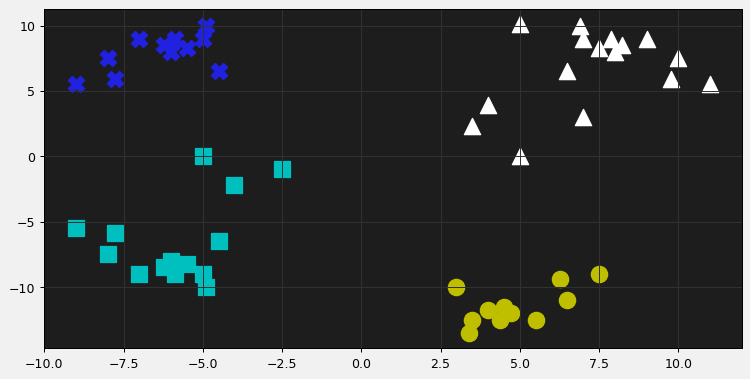

In [9]:
clust0 = clusters[0] # fisrt cluster
clust1 = clusters[1] # 2nd 
clust2 = clusters[2] # 3rd
clust3 = clusters[3] # 4th

plt.figure(figsize=(10, 5), dpi=90, edgecolor='b', facecolor='#f1f1f1') # creates a new figure to plot
ax_ = plt.gca()
ax_.set_facecolor('#1d1d1d')

ax_.scatter(clust0[:, 0], clust0[:, 1], s=170, marker='^', c='w') # plot 1st cluster with white triangles
ax_.scatter(clust1[:, 0], clust1[:, 1], s=170, marker='s', c='c') # plot 2nd with cyan squares
ax_.scatter(clust2[:, 0], clust2[:, 1], s=170, marker='o', c='y') # plot 3rd with yellow circles 
ax_.scatter(clust3[:, 0], clust3[:, 1], s=170, marker='X', c='#2121e1') # plor 4th with blue crosses

plt.grid(color='#313131')
plt.show() # show the plot

As we can see, k-means has performed pretty well! that's mainly due to the small amount of data and the low dimension (2 features only) so the risk of k-means making a bad centroid initialization and fall into a local minimum rather than the global becomes low, add the fact we already knew the number of clusters from the beginning. In the next section we'll see evaluation methods which come handy when trying to set the number of clusters.

# The Elbow Method
***

It simply consists of trying different successive numbers of clusters and choose the one from where the variation starts to decrease slowly (plotting may help recognize it):

In [11]:
elbow_clusters = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
elbow_vars = np.zeros((10, )) # variations

for i, clust in enumerate(elbow_clusters):
    elbow_vars[i] = km().fit(X, n_clusters=clust, verbose=0, tol=0).var_ # fit and return the variation
    print('for ', clust, ' clusters, the variation is: ', elbow_vars[i])

for  2  clusters, the variation is:  95.99027039399093
for  3  clusters, the variation is:  65.38360091721133
for  4  clusters, the variation is:  32.427648542057575
for  5  clusters, the variation is:  28.298344418793686
for  6  clusters, the variation is:  21.59325553833792
for  7  clusters, the variation is:  21.868324314981912
for  8  clusters, the variation is:  20.14146869994133
for  9  clusters, the variation is:  23.129550687819464
for  10  clusters, the variation is:  18.195918658274664
for  11  clusters, the variation is:  17.019772780864194


***
Now we plot the Elbow's curve and spot the right number of clusters !

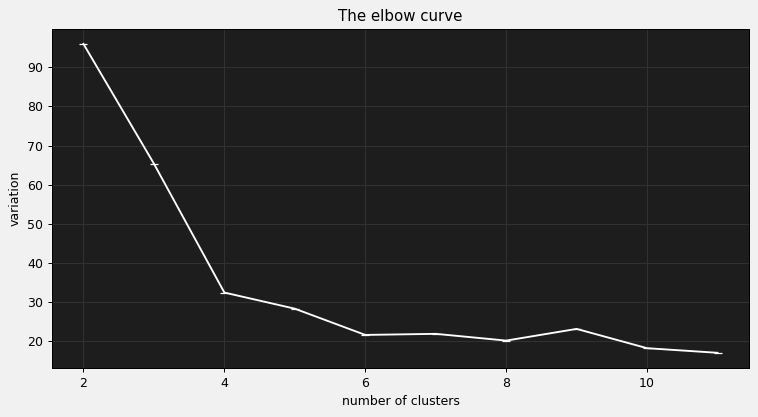

In [12]:
plt.figure(figsize=(10, 5), dpi=90, facecolor='#f1f1f1')
ax3 = plt.gca()
ax3.set_facecolor('#1d1d1d')
plt.plot(elbow_clusters, elbow_vars, marker='_', c='w')
plt.title("The elbow curve" )
plt.xlabel('number of clusters')
plt.ylabel('variation')

plt.grid(color='#313131')
plt.show()

As we can see, the curve starts to flatten (the elbow curve bending) from n = 4 clusters but this method generally doesn't work well as it becomes hard to spot the good number of clusters when the curve doesn't flatten from a specific point but smoothly decreasing at every point. Hopefully, another method comes to rescue:

# Silhouette Analysis
***
This method basically measures for each sample how similar he is to the members of his assigned cluster and how separate he is from the datapoints of the closest cluster, the .compute_silhouette() method I implemented returns the silouhette coefficients for each sample inside his own array all regrouped in a list, then all we have to do is compute the average for each cluster and choose the one with the best mean and make sure the average starts to decrease from this model, below I plot the silhouettes for better insight about this method: 

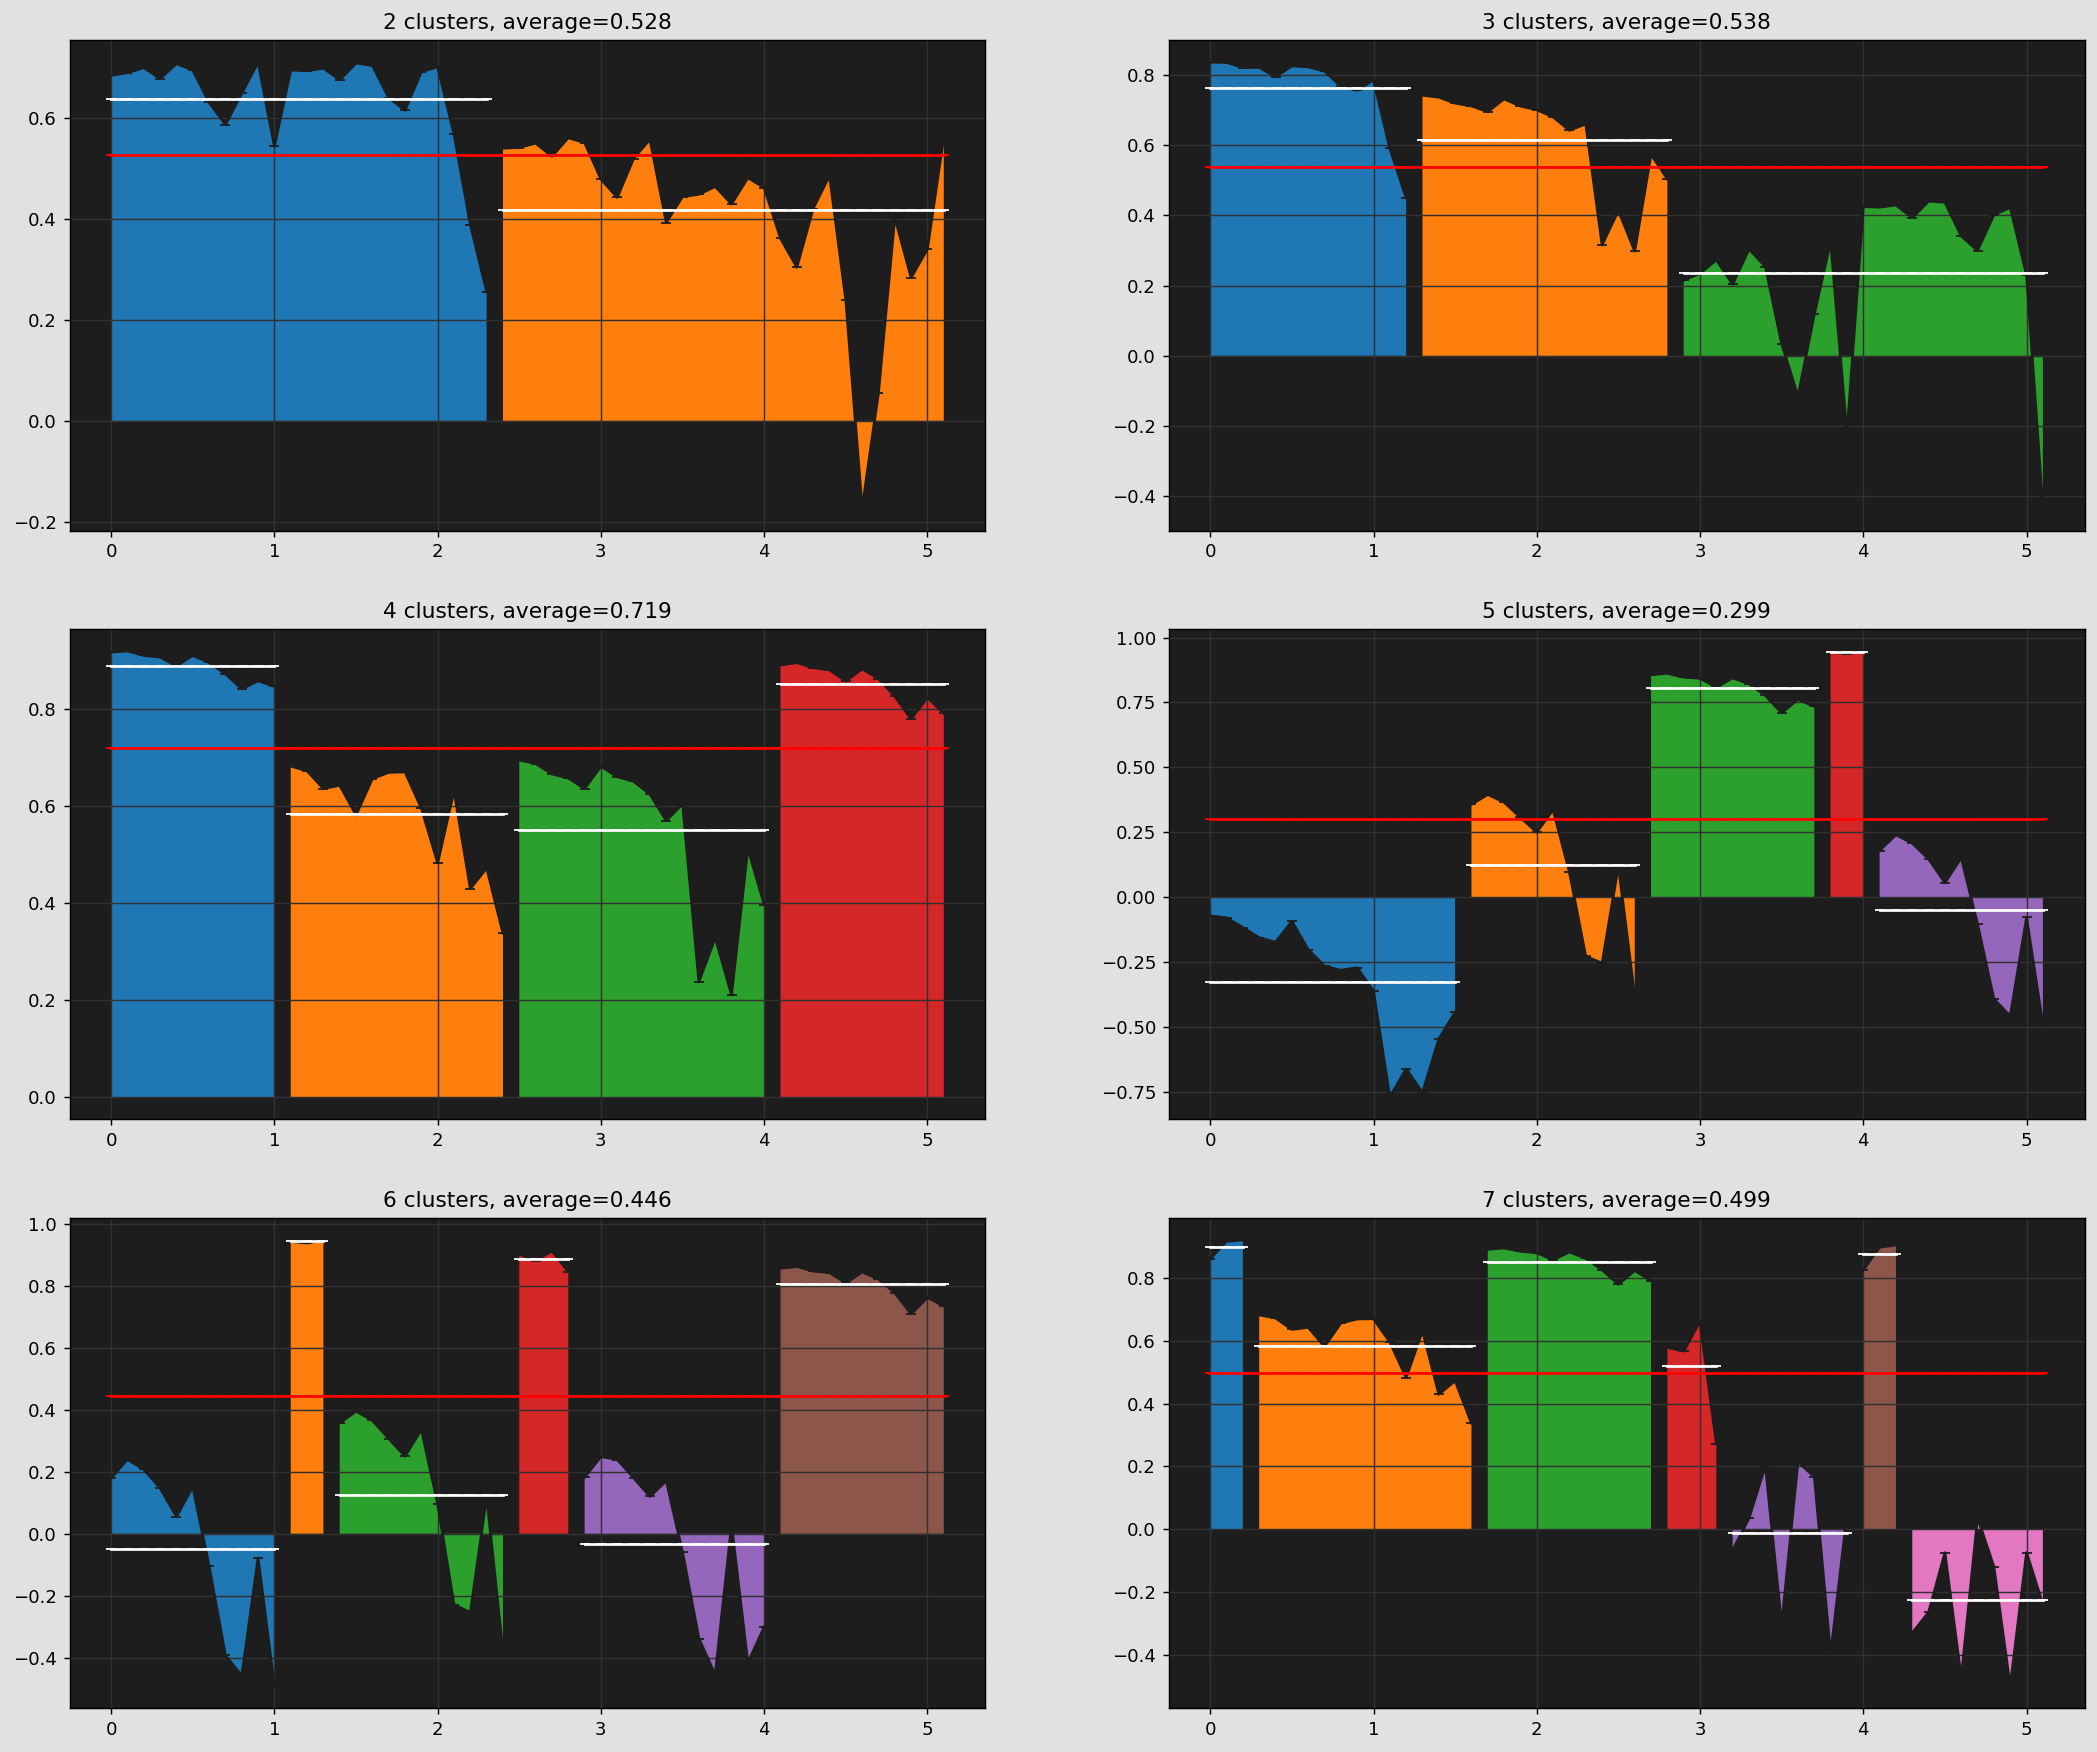

In [30]:
def plot_silhouettes(model_, ax):
    silhouettes = model_.compute_silhouette()
    clusters_ = model_.get_clusters()
    n_samples = len(model_.aff_)
    
    beg = 0 # offset        
    cum_mean = 0 # cumulative in-cluster silhouettes' mean

    for i in range(model_.n_clusters):
        nS = len(clusters_[i])
        sil = silhouettes[i]
        sil_range = np.arange(beg, np.float32(beg + 0.1 *  nS), 0.1) # create a range for the current cluster based on the number of samples i holds

        if(len(sil_range) > len(sil)): # correct range
            sil_range = sil_range[0:-1]
        
        ax.plot(sil_range, sil, marker='_', c='#1d1d1d') # plot the cluster's silhouette
        r
        # now let's plot the cluster average
        mean_ = np.mean(sil) # compute in-cluster silhouettes' mean
        cum_mean += mean_
        mean_ = np.tile(mean_, (nS, ) )
        ax.plot(sil_range, mean_ , marker='_', c='w') # plot cluster's silhouette
        beg = np.float32(beg + 0.1 * nS)  # prepare next range
        
    cum_mean /= model_.n_clusters
    cum_mean_y = np.tile(cum_mean, (n_samples, ) )
    cum_mean_range = np.arange(0, n_samples * 0.1, 0.1)
    ax.plot(cum_mean_range, cum_mean_y , marker='_', c='r') # plot the silhouettes' average
    ax.grid(color='#313131') # grid the plot
    ax.set_facecolor('#1d1d1d')
    ax.set_title("{0} clusters, average={1:.3f}".format(len(clusters_), cum_mean))
    return cum_mean # return average mean

# now, let's use the above function to plot for different number of clusters and compare between
try_clusters = [2, 3, 4, 5, 6, 7]
averages = [] # insert averages inside (for the next plot)

#plt.figure(figsize=(10, 4), dpi=90, facecolor='#e1e1e1') # new figure
fig, axes = plt.subplots(3, 2, figsize=(20, 17), dpi=130, facecolor='#e1e1e1')

for i in try_clusters:
    try_model = km().fit(X, verbose=0, tol=0, n_clusters=i)
    sub_x = int((i - 2) / 2)
    sub_y = (i - 2) % 2
    avrg = plot_silhouettes(try_model, ax=axes[sub_x, sub_y])
    averages.append(avrg)

As we can see, the model providing the best silouettes' coefficients average is the 4-clusters one, and that's right! if we plot the coefficients average function of the number of clusters, we can see that for n=4, the curve reach its maximum:

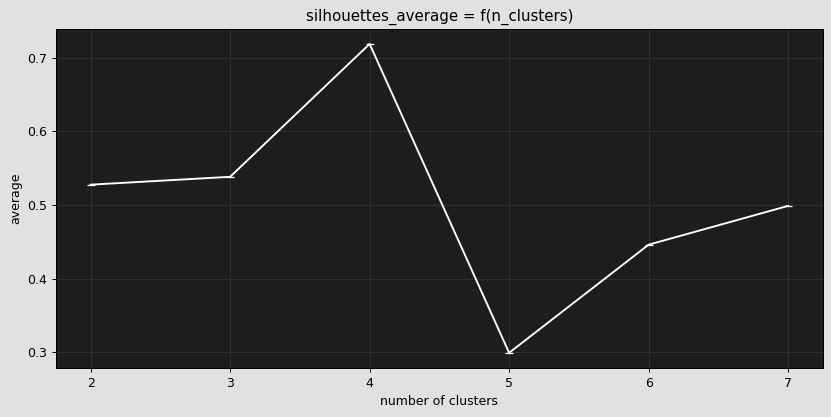

In [31]:
plt.figure(figsize=(11, 5), dpi=90, facecolor='#e1e1e1')

plt.plot(try_clusters, averages, marker='_', c='w')

ax4 = plt.gca()
ax4.set_facecolor('#1d1d1d')

plt.title("silhouettes_average = f(n_clusters)" )
plt.xlabel('number of clusters')
plt.ylabel('average')

plt.grid(color='#313131')
plt.show()

Finally, the silhouette metric is most of the time working fine and is by far better than the elbow method.

# Some references
***

1. [K-means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks Medium Article by Imad Dabbura](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)

2. [k-keans clustering on Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

3. [Coursera Andrew Ng's Machine Learning course (Unsupervised Learning Week)](https://www.coursera.org/)